# Characterization of an indoor environment

The VLC-RM Python package was created to estimate the DC gain, the interchannel interference, and the lighting parameters of a CSK system in rectangular empty rooms. To use this package, four modules must be imported.

- Transmitter
- Photodetector
- Indoor Environment
- Recursive Model

## Spectral Reflectance Processing

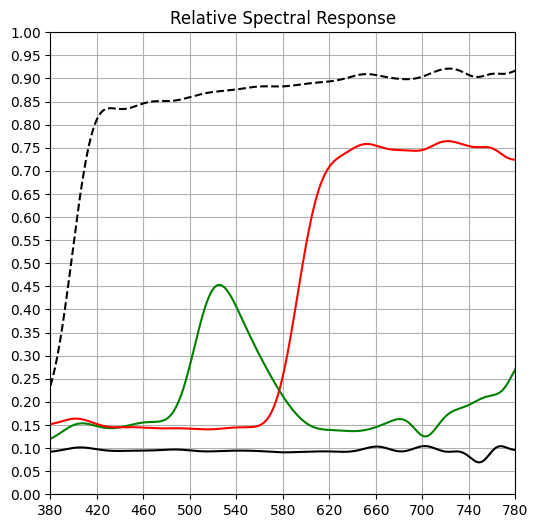

In [3]:
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from scipy.signal import butter, filtfilt

import numpy as np
from numpy import loadtxt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from numpy import genfromtxt


def moving_average(arr, window_size=3):
    return np.convolve(arr, np.ones(window_size) / window_size, mode='same')

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data


# Load LED option 2:
#read text file into NumPy array
floor = genfromtxt('spectral_data/wall_floor.csv', delimiter=',')
#read text file into NumPy array
wall_white = genfromtxt('spectral_data/wall_white.csv', delimiter=',')
#read text file into NumPy array
wall_green = genfromtxt('spectral_data/wall_green.csv', delimiter=',')
#read text file into NumPy array
wall_red = genfromtxt('spectral_data/wall_red.csv', delimiter=',')

cutoff = 1.0  # Cutoff frequency in Hz
sampling_rate = 100.0  # Sampling rate in Hz

xfloor = floor[:,0]
yfloor = butter_lowpass_filter(floor[:,1], cutoff, sampling_rate)/100
yfloor[yfloor<0.005] = 0
ffloor = interp1d(xfloor,yfloor)    

xwall_white = wall_white[:,0]
# ywall_white = wall_white[:,1]
ywall_white = butter_lowpass_filter(wall_white[:,1], cutoff, sampling_rate)/100
ywall_white[ywall_white<0.005] = 0
fwall_white = interp1d(xwall_white,ywall_white)    

xwall_green = wall_green[:,0]
ywall_green = butter_lowpass_filter(wall_green[:,1], cutoff, sampling_rate)/100
ywall_green[ywall_green<0.005] = 0
fwall_green = interp1d(xwall_green,ywall_green)

xwall_red = wall_red[:,0]
# ywall_red = wall_red[:,1]
ywall_red = butter_lowpass_filter(wall_red[:,1], cutoff, sampling_rate)/100
ywall_red[ywall_red<0.005] = 0
fwall_red = interp1d(xwall_red,ywall_red)

tick_values = np.linspace(380, 780, 11)  # Desired tick positions
plt.xticks(tick_values)  # Set the x-ticks to the specified values

x_simple = np.linspace(380, 780, 401)
# x_simple = [425, 510, 650]

plt.plot(x_simple, ffloor(x_simple), color='black')
plt.plot(x_simple, fwall_white(x_simple), color='black', linestyle='dashed')
plt.plot(x_simple, fwall_green(x_simple), color='g')
plt.plot(x_simple, fwall_red(x_simple), color='r')
plt.title('Relative Spectral Response')
plt.ylim(0, 1)
plt.locator_params(axis='y', nbins=20) 
plt.xlim(380,780)
plt.grid()
plt.show()




 List of parameters for LED transmitter: 
Name: Led1
Position [x y z]: [1.3400e+00 8.0000e-01 2.3000e+00] 
Normal Vector [x y z]: [[0.0000e+00 0.0000e+00 -1.0000e+00]] 
Lambert Number: 1.2999999523162842 
Central Wavelengths [nm]: [6.3000e+02 5.4000e+02 4.5800e+02] 
FWHM [nm]: [6.0000e+01 8.0000e+01 2.0000e+01]
Luminous Flux [lm]: 1692.0
Correlated Color Temperature: [[1.4717e+04]]
CIExy coordinates: [[2.9075e-01 2.3529e-01 4.7395e-01]]
ILER [W/lm]: 
 [[4.7657e-03 0.0000e+00 0.0000e+00]
 [0.0000e+00 2.1723e-03 0.0000e+00]
 [0.0000e+00 0.0000e+00 2.6209e-02]] 
Average Power per Channel Color: 
 [1.9981e+00 2.5250e+00 2.8934e+00] 
Total Power emmited by the Transmitter [W]: 
 7.416434928399591 



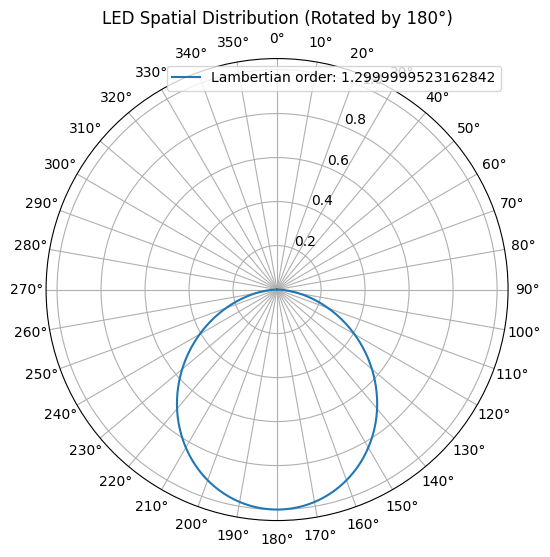


 List of parameters for photodetector PD1: 
Name: PD1 
Position [x y z]: [5.0000e-02 1.4500e+00 1.5000e-01] 
Normal Vector [x y z]: [[0.0000e+00 0.0000e+00 1.0000e+00]] 
Active Area[m2]: 3.333333370392211e-05 
FOV: 89.9000015258789 
Sensor: TCS34725


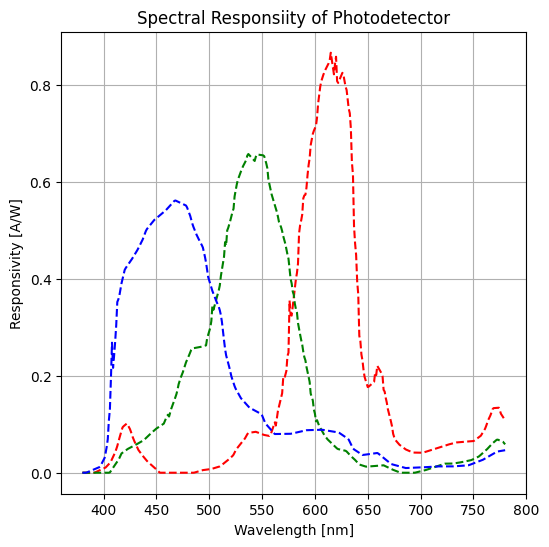


 Creating parameters of indoor environment ...
Parameters created!


 List of parameters for indoor envirionment Room: 
Name: Room
Size [x y z] -> [m]: [2.6800e+00 1.5000e+00 2.4200e+00] 
Order reflection: 15 
Resolution points [m]: 0.10000000149011612
Smaller Area [m^2]: 0.010287918150424957
Number of points: 2750


 Simulating indoor environment ...
Simulation done! 


|=============== Simulation results ================|
Name: ChannelModelA 
DC-Gain with respect to 1-W [W]: 
 [3.1343e-06 3.1274e-06 3.1213e-06 3.1154e-06 3.1096e-06 3.1048e-06
 3.1015e-06 3.1002e-06 3.0982e-06 3.0971e-06 3.0992e-06 3.1005e-06
 3.1027e-06 3.1048e-06 3.1067e-06 3.1076e-06 3.1112e-06 3.1115e-06
 3.1116e-06 3.1094e-06 3.1081e-06 3.1046e-06 3.1001e-06 3.0956e-06
 3.0911e-06 3.0839e-06 3.0789e-06 3.0722e-06 3.0678e-06 3.0619e-06
 3.0584e-06 3.0573e-06 3.0546e-06 3.0543e-06 3.0544e-06 3.0567e-06
 3.0602e-06 3.0631e-06 3.0670e-06 3.0730e-06 3.0810e-06 3.0871e-06
 3.0938e-06 3.1018e-06 3.1083e-06 3.1168e-06 3

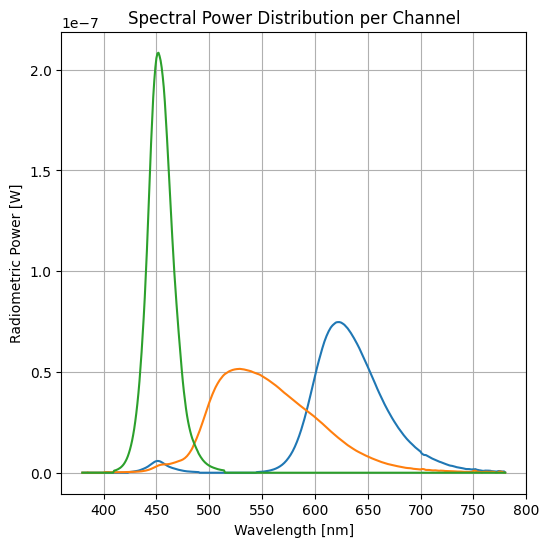

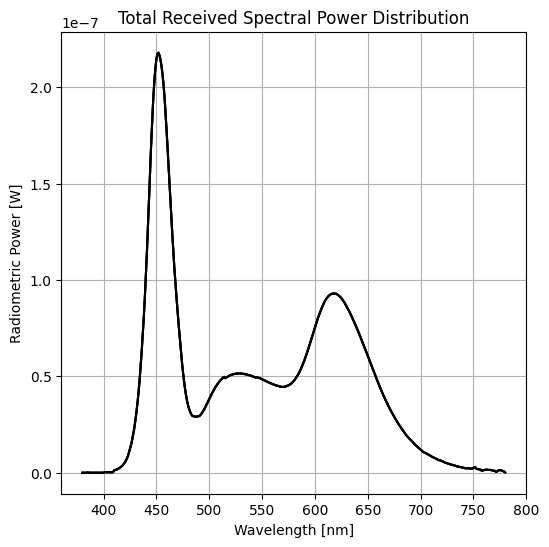

In [4]:
# Import Transmitter
from vlc_rm.transmitter import Transmitter
# Import Photodetector
from vlc_rm.photodetector import Photodetector
# Import Indoor Environment
from vlc_rm.indoorenv import Indoorenv
# Import REcursiveModel
from vlc_rm.recursivemodel import Recursivemodel
# Import Symbol Constants
from vlc_rm.constants import Constants as Kt

#Import luxpy   
import luxpy as lx

# Import Matplotlob
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.facecolor']='white'

""" 
Define transmitter, receiver and indoor space

The transmitter of a system is defined from a set of parameters as follows:
"""

position1 = [2.63, 0.05, 0.15]
position2 = [1.34, 0.05, 0.15]
position3 = [0.05, 0.05, 0.15]
position4 = [2.63, 0.75, 0.15]
position5 = [1.34, 0.75, 0.15]
position6 = [0.05, 0.75, 0.15]
position7 = [2.63, 1.45, 0.15]
position8 = [1.34, 1.45, 0.15]
position9 = [0.05, 1.45, 0.15]

Kt.NO_WAVELENGTHS = 401

# Defining constellation
constellation_CCT_14702K = np.array([
        [1.84345385e-01, 7.38834381e-01, 4.47133923e-01, 6.45024493e-01,
        3.75238705e-01, 4.35614856e-08, 4.33066752e-08, 9.38096897e-02,
        2.81429063e-01, 2.78155071e-01, 9.05943323e-02, 9.05351631e-02,
        1.87619316e-01, 7.35878485e-09, 5.51920368e-01, 1.51697445e-08],
       [7.20296776e-01, 2.56166047e-01, 5.21440747e-01, 3.49975920e-01,
        6.29761077e-01, 7.23238577e-01, 8.17049860e-01, 9.11190259e-01,
        7.23570832e-01, 6.26486840e-01, 7.20179623e-01, 8.14106761e-01,
        8.17380513e-01, 1.00499996e+00, 4.44486050e-01, 9.11190154e-01],
       [9.03579571e-02, 6.16638672e-08, 2.64254558e-02, 6.19895048e-08,
        2.13728369e-08, 2.81096419e-01, 1.87287656e-01, 4.11806558e-09,
        1.14805445e-08, 9.03582219e-02, 1.84226171e-01, 9.03582035e-02,
        1.73143565e-08, 7.45143600e-09, 4.09526433e-08, 9.38096901e-02]
        ])

constellation_CCT_2702K = np.array([[4.08395104e-02, 6.69294862e-01, 3.29383654e-01, 5.20775607e-01,
        4.25079592e-01, 2.86535526e-01, 4.77927266e-01, 7.12174282e-01,
        6.16471764e-01, 3.38077463e-09, 3.82231381e-01, 9.51438872e-02,
        1.90839690e-01, 1.37991895e-01, 5.73623318e-01, 2.33687761e-01],
       [9.50695543e-01, 3.35649783e-01, 6.65616455e-01, 4.74224653e-01,
        5.69920577e-01, 7.18464206e-01, 5.27072300e-01, 2.82826725e-01,
        3.78528675e-01, 1.00499998e+00, 6.22768284e-01, 9.09855955e-01,
        8.14160087e-01, 8.57008134e-01, 4.31376341e-01, 7.61312305e-01],
       [3.46503412e-03, 5.56154166e-08, 8.64474581e-08, 7.11770258e-08,
        7.81531942e-08, 4.22102147e-08, 4.81337927e-08, 6.00517309e-08,
        6.51819269e-08, 6.83793116e-09, 4.50133236e-08, 3.04912441e-08,
        3.96789446e-08, 1.08802059e-07, 5.16254023e-08, 9.64648264e-08]])
# constellation_white = np.array([[2.6587e-01], [6.5712e-01], [7.7008e-02]])

# Create a transmitter-type object
transmitter = Transmitter(
        name="Led1",
        led_type='custom',
        reference='RGB-Phosphor',
        position=[1.34, 0.8, 2.30],
        normal=[0, 0, -1],
        mlambert=1.3,
        wavelengths=[630, 540, 458],
        fwhm=[60, 80, 20],
        # constellation=constellation_white,
        constellation=constellation_CCT_14702K,        
        # luminous_flux=3441
        luminous_flux=1692
                )
print(transmitter)
# transmitter.plot_spd_normalized()
# transmitter.plot_spatial_distribution()
transmitter.plot_spatial_distibution_planec0_c180()

pd = Photodetector(
    "PD1",
    position=position9,
    normal=[0, 0, 1],
    area=(1e-4)/3,
    fov=89.9,
    # sensor='TCS3103-04',
    # sensor='S10917-35GT',
    sensor='TCS34725',
    idark=1e-12,
    gain=3e5
            )
print(pd)
pd.plot_responsivity()

room = Indoorenv(
    "Room",
    size=[2.68, 1.5, 2.42],
    no_reflections=15,
    resolution=1/10,
    ceiling=fwall_white(x_simple)[::-1],
    west=fwall_white(x_simple)[::-1],
    north=fwall_green(x_simple)[::-1],
    east=fwall_white(x_simple)[::-1],
    south=fwall_red(x_simple)[::-1],
    floor=ffloor(x_simple)[::-1]
#       ceiling=[0.90, 0.85, 0.80],
#       west=[0.90, 0.85, 0.80],
#       north=[0.15, 0.40, 0.15],
#       east=[0.90, 0.85, 0.80],
#       south=[0.70, 0.15, 0.15],
#       floor=[0.10, 0.10, 0.10]
        )
room.create_environment(transmitter, pd)
print(room)

"""
Simulation of the indoor environment

The simulation of the indoor WDM-VLC is carried out by the 
'RecursiveModel' module, which is defined as follows.

"""

# Define Channel Model
channel_model = Recursivemodel(
    "ChannelModelA",
    transmitter,
    pd,
    room
    )

# --- Simulate indoor channel ------
channel_model.simulate_channel()
print(channel_model)   
Hnormalized = channel_model._norm_channelmatrix
print("Normalized H matrix:")
print(Hnormalized)
channel_model.plot_spd_channel()
channel_model.plot_spd_total()
